In [1]:
# Please note that all answers are bolded. Answers to Questions #2, 4, 5 are broken into multiple cells.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        22:21:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

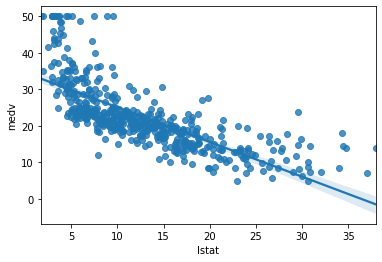

In [2]:
# You will need to change this for your environment
DATA_ROOT = '/Users/wanghaobo/Documents/ALL CSV FILES - 2nd Edition/'
df = pd.read_csv(DATA_ROOT + 'Boston.csv', index_col=0)
df.head()

# We will use the Boston house data from the text book in part of this lab. Here is a regression
# of median house price against proportion of residents in a neighborhood in a lower economic demographic.
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

print(result.summary())

sns.regplot('lstat', 'medv', df)
plt.show()

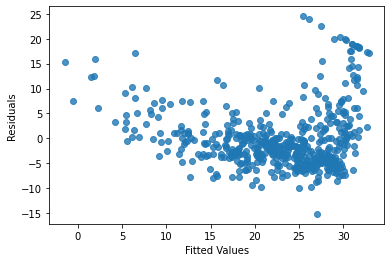

In [3]:
# Plot residuals against fitted values
# You can get the fitted values and the residuals as properties of the regression, among other properties

fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)
plt.show()

# Multiple Linear Regression

In [4]:

# Add one other feature to compare the regression fit
m1 = sm.OLS.from_formula('medv ~ lstat + age', df)
r1 = m1.fit()
print(r1.summary())

# We can use an ANOVA to test the null hypothesis that the regression using the squared term
# does not improve the fit. For example, this ANOVA shows an F score of 135
# and a p-value of virtually zero, indicating an improved fit
print(sm.stats.anova_lm(result, r1))

# The anova table shows F statistics and p-values for the null hypotheses that the
# model with age as well as lstat fits the data as well as the first model, which
# can be rejected with a p-value of 0.005



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        22:21:33   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [5]:
# Add all the other features:
# This syntax lets us easily reference all the other columns save
m2 = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
r2 = m2.fit()
print(r2.summary())

print(sm.stats.anova_lm(r1, r2))

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.23e-133
Time:                        22:21:33   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

# Questions 1-3

Question 1: can we reject the null hypothesis that the model for median value (medv)
with all the fields fits the data no better than the model with only lstat and age? Why?

Question 2: from the result of the second regression, which predictor variables would you
drop from the regression? You can drop variables by adding them to the list in the
difference call, e.g. to drop crime, use 'df.columns.difference(['medv', 'crim'])'
(Although this is not to imply that crime should be dropped from the regression):



**ANSWER 1: The ANOVA table above shows the F statistic and p-value for testing the null hypothesis that the
model with all the fields fits the data just as well as the model with only lstat and age. Since the p-value is 3.566e-50 (i.e., virtually zero), the null hypothesis can be rejected. <br>Furthermore, the model with all the fields has an R-squared of 0.734 compared to an R-squared of 0.551 for the model with only lstat and age. This indicates that the model with all the fields provides a better fit for the data.**

**ANSWER 2: I would consider dropping predicator variables with statistically insignificant p-values, which are indus and age (at a 95% confidence level). Using the backward selection method, we first remove the variable with the largest p-value, which is indus.**

In [6]:
#print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'crim'])), df).fit().summary())
# Insert your own model here or edit above

print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'indus'])), df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.00e-134
Time:                        22:21:33   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5437      4.920      8.445      0.0

**Next, we remove the variable with the largest p-value again, which is age.**


In [7]:
print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'indus', 'age'])), df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.73e-135
Time:                        22:21:33   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.0

**At this point, the stopping rule for backward selection is reached since all the remaining variables have significant p-values at a confidence level of 95%. To summarize, the predicator variables dropped were the ones with statistically insignificant p-values, which are indus and age.**

Question 3: After you drop these variables, what is the R-squared and how does it compare to the
full R-squared and that of the model with lstat and age?


**ANSWER 3: After dropping indus and age, the new model has a R-squared of 0.734, which is equal to that of the model with all the variables. It should be slightly smaller but the difference is omitted since the table rounds numbers to three decimal places. Additionally, the R-squared of the new model is higher than that of the model with lstat and age, which is 0.551.**

# Interaction terms


In [8]:
# You can include interaction terms in the regression formula with a '*'. For example,
# this regression includes lstat * age, and automatically includes both lstat and age.
print(sm.OLS.from_formula('medv ~ lstat*age', df).fit().summary())



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.86e-88
Time:                        22:21:33   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# Question 4

Question 4: Based on the regression graph of medv regressed onto lstat in the second cell, above, would
you expect that including a squared term for lstat might be useful for the model? Why?


**ANSWER 4: Yes, I expect that including squared lstat would be useful for the model for two reasons. First, the plot of residuals against fitted values in the third cell shows a pattern in which the error variance tends to get larger as the fitted value increase. This indicates a non-constant error variance (heteroscedasticity), which could potentially be remedied by incorporating a squared term. <br> Secondly, as shown below, median house price regressed on squared lstat only shows its significant p-value of 0, indicating its explanatory power for median house price.**

In [9]:
lm.fit1 = sm.OLS.from_formula('medv ~ np.square(lstat)', df).fit()
print(lm.fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     318.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.50e-55
Time:                        22:21:33   Log-Likelihood:                -1716.4
No. Observations:                 506   AIC:                             3437.
Df Residuals:                     504   BIC:                             3445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           27.6474      0.430  

In [10]:
# You can also include functions of predictor variables. For example, this version
# includes a squared term for lstat
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print(lm.fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        22:21:34   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [11]:
print(sm.stats.anova_lm(result, lm.fit2))

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


**The table above shows a high F-statistic of 135 and a P-value of 7.630116e-28 (virtually zero), which can reject the null hypothesis that the model with only lstat fits the data as well as the model with lstat and squared lstat. This confirms the previous reasoning in support of including squared lstat in Question #4.**

# Qualitative variables


In [12]:
# We turn now to a new data set from the text book, on number of car seats sold,
# which includes three qualitative variables.
# Recall you may need to modify this line to load the data on your setup:

df2 = pd.read_csv(DATA_ROOT + 'Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
# The regression defined with the from_formula call automatically converts the
# three categorical variables to dummy variables.

print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales'])), df2).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.60e-166
Time:                        22:21:34   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

# Question 5

Question 5: Why are there two variables for Shelving location included in the
regression? Which variables would you consider dropping from this regression?


**ANSWER 5: When setting up dummy variables for a qualitative regressor, you create (k - 1) dummy variables for a total of k categories. Since Shelving location has three categories (Good, Medium, Bad), we create two dummy variables for it. Here, the base case is 'Bad' since it is not assigned a dummy variable.
<br>I would consider dropping predicator variables with statistically insignificant p-values, which are US, Urban, Population, and Education (at a 95% confidence level). Using the backward selection method, I will drop the variable with the highest p-value and repeat the process until all of the p-values are statistically significant. In this case, I will start by dropping Population.**

In [14]:
# You can show the result of dropping the variables you suggest here (not scored)
print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales', 'Population'])), df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.11e-167
Time:                        22:21:34   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.7619    

**Next, I will remove the variable with the largest p-value again, which is Urban.**

In [15]:
print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales', 'Population', 'Urban'])), df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.09e-168
Time:                        22:21:34   Log-Likelihood:                -569.72
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     390   BIC:                             1199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.8140    

**Next, I will remove the variable with the largest p-value again, which is Education.**

In [16]:
print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales', 'Population', 'Urban', 'Education'])), df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.16e-169
Time:                        22:21:34   Log-Likelihood:                -570.43
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4928    

**Next, I will remove the variable with the largest p-value again, which is US.**

In [17]:
print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales', 'Population', 'Urban', 'Education', 'US'])), df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.25e-170
Time:                        22:21:34   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752    

**At this point, the stopping rule of backward selection is reached since all the remaining variables have significant p-values at a confidence level of 95%.**